#### Building Innovative Systems - Assignment 1
#### Name: Dilmanpreet Singh
#### Roll No: 101903506
#### Batch: 4Co19

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xgboost as xg
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math

### Importing Dataset

In [2]:
df = pd.read_excel('DATASET.xlsx')

c:\Users\sdp84\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\sdp84\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [3]:
df = df.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])
j = 0
for i in range(100):
    df.iloc[j:j + 10, 0] = df.iloc[j, 0]
    j += 10

### Data Preprocessing

In [4]:
#Renaming first column
df.columns = df.columns.str.replace('Unnamed: 0', 'Section')

In [5]:
#Replacing empty cells with zero
df.fillna(0, inplace=True)

In [6]:
#Defining the Test Dataset
test_dataset = df.loc[df['year'] == 10]
test_dataset

,Section,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [7]:
test_dataset.columns = test_dataset.columns.str.replace('Unnamed: 0', 'Section')

In [8]:
df.head(20)

,Section,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
5,Sec_1,6,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.810
6,Sec_1,7,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.860
7,Sec_1,8,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.890
8,Sec_1,9,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.920
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960


### Model Definition 

In [9]:
xgb=xg.XGBRegressor(n_estimators=500,seed=42)

### Model Application

In [10]:
pred = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
col_name = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [11]:
def selectedModel():
    RMSE = []
    N = 0
    index = 0
    for j in [10, 11, 12, 13, 14]:
        ans = 0
        count = 0
        for i in range(0, 1000, 10):
            #Extracting Train and Test Data
            xtrain = df.iloc[i:i+9, 1:10]
            ytrain = df.iloc[i:i+9, j]
            xtest = df.iloc[i+9, 1:10].to_numpy()
            ytest = df.iloc[i+9, j]
            xgb.fit(xtrain, ytrain)
            ypred = xgb.predict(xtest.reshape(1,-1))[0]
            pred[col_name[index]].append(ypred)
            ans += (ytest - ypred)**2
            count += 1
            N += 1
        RMSE.append(ans)
        index += 1
    return (RMSE, count)

In [12]:
#Applying XGBoost regressor
result_RMSE, result_count = selectedModel()

In [13]:
dataset_predicted = pd.DataFrame.from_dict(pred)
dataset_predicted

,Para-9,Para-10,Para-11,Para-12,Para-13
0,3.398811e+00,6.049885e+01,5.699891e+01,7.999336,1.918818
1,6.089891e+01,3.019855e+01,9.993413e-01,7.999299,0.792745
2,7.539892e+01,1.401298e-45,1.401298e-45,13.998545,1.412780
3,2.479873e+01,5.698064e+01,6.399891e+01,7.999380,1.887874
4,1.401298e-45,2.617977e+02,3.399949e+01,5.999571,1.768963
...,...,...,...,...,...
95,1.893978e+02,1.916988e+02,9.998878e+00,7.998791,1.554789
96,5.198826e+00,7.109889e+01,2.399929e+01,11.999558,1.075073
97,1.221987e+02,6.769852e+01,1.499837e+01,11.998895,0.981828
98,1.407989e+02,2.927989e+02,1.669982e+02,11.999269,2.120749


### RMSE Calculation

In [14]:
#RMSE for each column
for i in result_RMSE:
    print((i/result_count)**0.5)

43.55268048992029
31.47703064814566
14.272986241244691
13.715414147031584
0.10357705355713089


In [15]:
#Mean RMSE
print((sum(result_RMSE)/500)**0.5)

25.610470069699083


### Plots

In [16]:
import random
ind = []
for i in range(40):
    ind.append(random.randint(0,100))

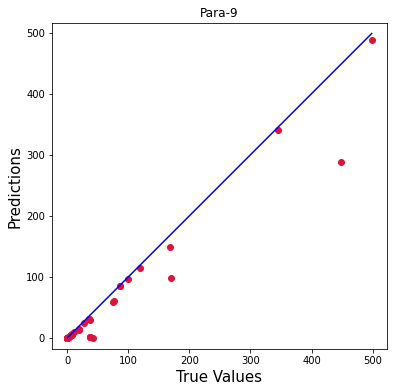

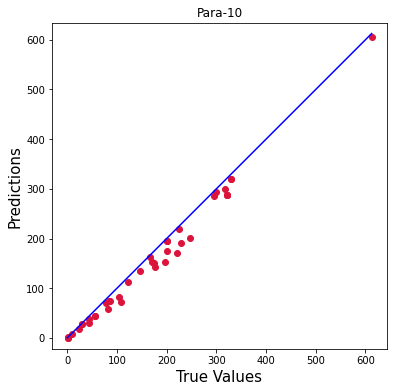

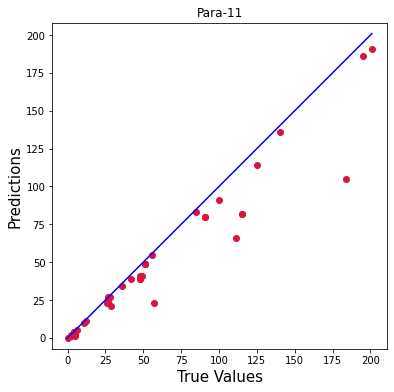

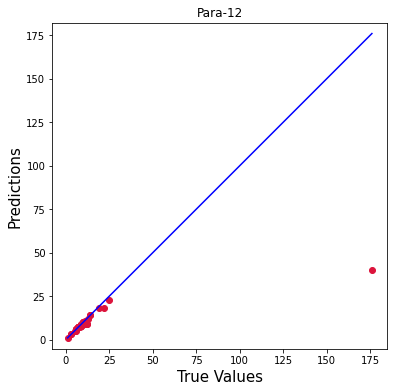

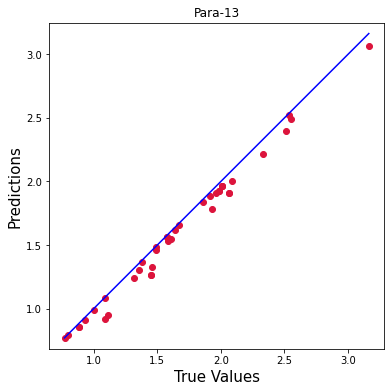

In [22]:
for i in range(5):
    plt.figure(figsize=(6,6))
    true_value = test_dataset.iloc[ind, i+10]
    predicted_value = dataset_predicted.iloc[ind, i]
    plt.scatter(true_value, predicted_value, c='crimson')


    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title(col_name[i])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

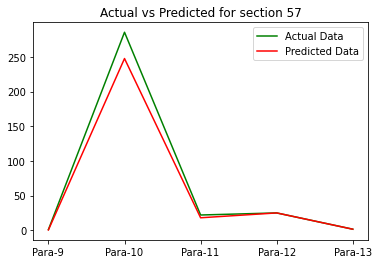

In [35]:
# Graph between Actual and Predicted values for a particular section
line_1 = test_dataset.iloc[57, 10:]
line_2 = dataset_predicted.iloc[57, :]
fig, ax = plt.subplots()
ax.plot(line_1, color = 'green', label = 'Actual Data')
ax.plot(line_2, color = 'red', label = 'Predicted Data')
plt.title("Actual vs Predicted for section 57")
ax.legend()
plt.show()

In [ ]:
# Extra Trees Classifier
model = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=3654, verbose=0, warm_start=False)
predicted = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
headers = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

rmse = []
n = 0
idx = 0
for j in [10, 11, 12, 13, 14]:
  res = 0
  count = 0
  for row in range(0, 1000, 10):
    xtrain = df.iloc[row:row+9, 1:10]
    ytrain = df.iloc[row:row+9, j]
    xtest = df.iloc[row+9, 1:10].to_numpy()
    ytest = df.iloc[row+9, j]
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest.reshape(1,-1))[0]
    predicted[headers[idx]].append(ypred)
    res += (ytest - ypred)**2
    count += 1
    n += 1
  rmse.append(res)
  idx += 1

In [14]:
#RMSE for each column
for i in rmse:
    print((i/count)**0.5)

63.4922254206466
62.01254023340765
25.57055642726611
14.497817663358852
0.2243031936303629


In [15]:
#Mean RMSE
print((sum(rmse)/500)**0.5)

41.811262167002035
